In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Mobilnet Model

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
train_path = r'/content/drive/MyDrive/Swachta mitra /Train'
valid_path = r'/content/drive/MyDrive/Swachta mitra /Valid'
test_path = r'/content/drive/MyDrive/Swachta mitra /Test'

In [ ]:
bs=100
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=bs)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=bs)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=bs, shuffle=False)

Found 6000 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 1400 images belonging to 2 classes.


In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [ ]:
x = mobile.layers[-6].output
predictions=Dense(2,activation='softmax')(x)
model=Model(inputs=mobile.input,outputs=predictions)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, 
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2 )

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


60/60 - 425s - loss: 0.5448 - accuracy: 0.7472 - val_loss: 0.7150 - val_accuracy: 0.6708
Epoch 2/10
60/60 - 417s - loss: 0.3623 - accuracy: 0.8322 - val_loss: 0.5884 - val_accuracy: 0.7692
Epoch 3/10
60/60 - 417s - loss: 0.2896 - accuracy: 0.8797 - val_loss: 0.5454 - val_accuracy: 0.7642
Epoch 4/10
60/60 - 415s - loss: 0.2380 - accuracy: 0.9112 - val_loss: 0.5431 - val_accuracy: 0.7533
Epoch 5/10
60/60 - 414s - loss: 0.2002 - accuracy: 0.9367 - val_loss: 0.5637 - val_accuracy: 0.7358
Epoch 6/10
60/60 - 414s - loss: 0.1676 - accuracy: 0.9547 - val_loss: 0.5560 - val_accuracy: 0.7433
Epoch 7/10
60/60 - 414s - loss: 0.1445 - accuracy: 0.9697 - val_loss: 0.5494 - val_accuracy: 0.7558
Epoch 8/10
60/60 - 414s - loss: 0.1244 - accuracy: 0.9745 - val_loss: 0.5343 - val_accuracy: 0.7742
Epoch 9/10
60/60 - 415s - loss: 0.1070 - accuracy: 0.9842 - val_loss: 0.5512 - val_accuracy: 0.7767
Epoch 10/10
60/60 - 414s - loss: 0.0914 - accuracy: 0.9888 - val_loss: 0.5998 - val_accuracy: 0.7417


In [ ]:
test_labels=test_batches.classes

In [ ]:
test_labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
test_batches .class_indices

{'Garbage': 0, 'Non Garbage': 1}

In [ ]:
predictions = model.predict(x=test_batches, verbose=2)

14/14 - 78s


In [ ]:
def plot_confusion_matrix(cm, classes,
        normalize=True,
        title='Confusion matrix',
        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

In [ ]:
cm_plot_labels = ['garbage', 'non_garbage']

Normalized confusion matrix
[[0.86285714 0.13714286]
 [0.35       0.65      ]]


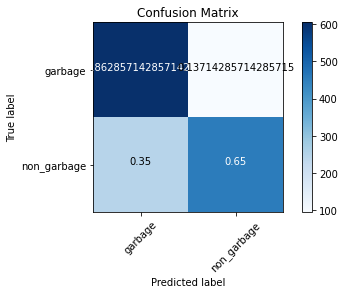

In [ ]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [ ]:
model.save('/content/drive/MyDrive/Swachta mitra /Mobilnet_saved_latest')


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Swachta mitra /Mobilnet_saved_latest/assets


## Resnet50


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
import os, cv2, random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm
from random import shuffle 
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
%matplotlib inline
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
mobile = tf.keras.applications.ResNet50()

102973440/102967424 [==============================] - 1s 0us/step


In [ ]:
mobile.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
x = mobile.layers[-6].output
predictions=Dense(2,activation='softmax')(x)
model=Model(inputs=mobile.input,outputs=predictions)

In [ ]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
bs=100
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=bs)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=bs)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=bs, shuffle=False)

Found 6000 images belonging to 2 classes.
Found 1200 images belonging to 2 classes.
Found 1400 images belonging to 2 classes.


In [ ]:
model.fit(x=train_batches, 
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=10,
          verbose=2 )

Epoch 1/10


ValueError: ignored

In [ ]:
model = Sequential()
model.add(ResNet50(include_top=False, pooling='max', weights=RESNET_WEIGHTS_PATH))
model.add(Dense(NUM_CLASSES, activation='softmax'))
# ResNet-50 model is already trained, should not be trained
model.layers[0].trainable = True

NameError: ignored